## Task 1: NN Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import *
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.metrics import *
import datetime, os 
from keras_visualizer import visualizer
from tensorflow.keras.utils import plot_model

In [2]:
n = 5000

features = np.random.rand(n,2) * 2 - 1
# This is used to scale the features to range {-1,1}. We multiply by 2 to shift range to {0,2} and then when we subtract by 1 we we get it to range {-1,1}!

labels = np.zeros((n,))
# Create an array of zeros

labels[np.logical_or(np.logical_and(features[:,1] > 0,features[:,0] > 0),np.logical_and(features[:,1] < 0,features[:,0] < 0))] = 1
#the code is defining a decision boundary that separates the data into two classes:
#Class 1: Data points where either both features are positive or both features are negative.
#Class 0: Data points that don't meet the criteria for Class 1.

Input Features:  (5000, 2)
Labels:  (5000,)


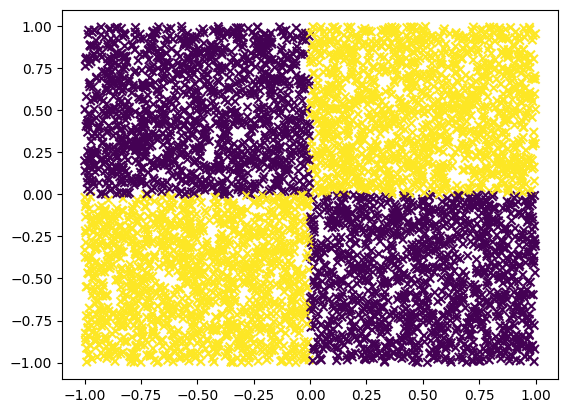

In [3]:
print("Input Features: ", features.shape)
print("Labels: ", labels.shape)
# Prints the dimension of the label as well as feature dataset.
plt.figure()
plt.scatter(features[:,0], features[:,1], marker="x", c=labels);
# plots the scatter plot for features with X marks.

In [4]:
model = keras.Sequential()
# Create a model i.e. sequential.
model.add(layers.Input(shape=(2,)))
# Creation of the input layer of the neural netework.
model.add(layers.Dense(8, activation='relu', 
          kernel_initializer='random_normal',
          bias_initializer='zeros'))
model.add(layers.Dense(4, activation='relu', 
          kernel_initializer='random_normal',
          bias_initializer='zeros'))
# Add the hidden layers to the neural netwoks,with defination of their activation functions.
model.add(layers.Dense(1, activation='sigmoid'))
# Add another layer with activation function sigmoid.

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# Visualise the neural network!

optim = keras.optimizers.Adam()
# Use the adam optimiser to optimise the performance of the neural network!

model.compile(optimizer=optim, loss='binary_crossentropy', metrics=[BinaryAccuracy()])
#  The code configures the model to use the specified optimizer (optim) to minimize the binary cross-entropy loss function.

logdir = os.path.join("binary_classification_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# This code snippet creates a directory path for storing logs related to a binary classification task.

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# This line of code sets up a TensorBoard callback to log the training process of a Keras model. 

hist = model.fit(features, labels, epochs=50, batch_size=16, validation_split=0.2)
# Fit the model to the data available.

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.6951 - loss: 0.6870 - val_binary_accuracy: 0.9030 - val_loss: 0.6209
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9305 - loss: 0.5667 - val_binary_accuracy: 0.9350 - val_loss: 0.3913
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9545 - loss: 0.3437 - val_binary_accuracy: 0.9730 - val_loss: 0.2403
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9697 - loss: 0.2179 - val_binary_accuracy: 0.9820 - val_loss: 0.1736
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9873 - loss: 0.1556 - val_binary_accuracy: 0.9880 - val_loss: 0.1367
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9892 - loss: 0.1211 - val_binary_accuracy: 0.9920 - val_loss: 0.1146
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9918

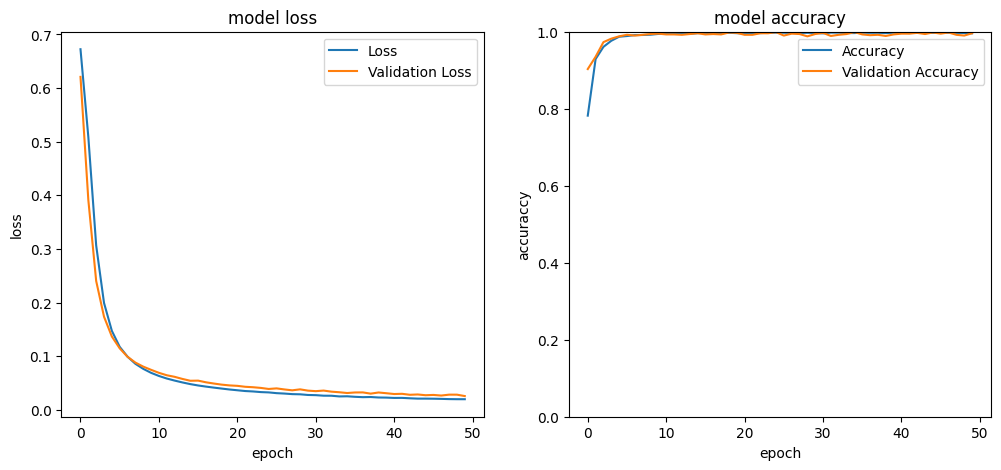

In [5]:
%matplotlib inline
plt.figure(figsize=(12,5))
# Define the figure size
plt.subplot(1,2,1)
# Creates sub-plot.
plt.plot(hist.history['loss'], label="Loss")
# Creates a plot with loss the model reported.
plt.plot(hist.history['val_loss'], label="Validation Loss")
# Plots the validation lost in the plot.
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Define title, X-label and Y-label.
plt.legend()
# Defines the legend.
plt.subplot(1,2,2)
# Creates the subplot 2.
plt.plot(hist.history['binary_accuracy'], label="Accuracy")
# Plots the binary accuracy of the model.
plt.plot(hist.history['val_binary_accuracy'], label="Validation Accuracy")
# Plots the validation accuracy of the model.
plt.ylim((0,1))
# Sets the y-limit of the graph.
plt.title('model accuracy')
plt.ylabel('accuraccy')
plt.xlabel('epoch')
# Defines the title, X-axis label and Y-axis label
plt.legend()
# Plots the legend.

1513/1513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


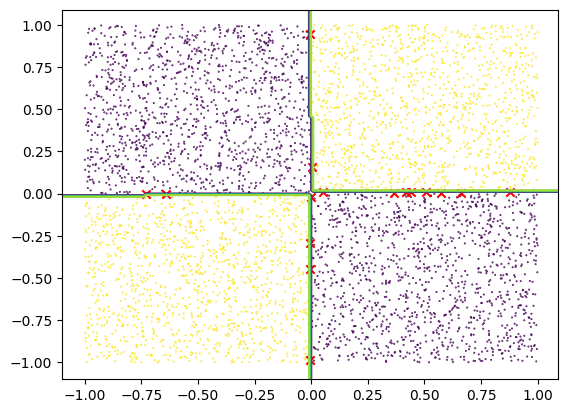

In [8]:
x = np.arange(-1.1,1.1, 0.01)
y = np.arange(-1.1, 1.1, 0.01)
# This code snippet creates two NumPy arrays, x and y, containing evenly spaced numbers within a specific range.

xv, yv = np.meshgrid(x, y)
# This line of code creates a 2D grid of points using the np.meshgrid function from NumPy.

sh = xv.shape
# get the shape of the newly cerated array

xv_lin = xv.reshape(-1,1)
yv_lin = yv.reshape(-1,1)
# Reshape the created arrays. 

xy = np.hstack((xv_lin,yv_lin))
# This line of Python code using NumPy is used to horizontally stack two arrays, xv_lin and yv_lin, into a single 2D array named xy

score = model.predict(xy)
# Use model to predict data in xy array.

score[score<0.5] = 0
score[score>=0.5] = 1
# Categorise the data points based on the predicted output.

plt.figure()
plt.contour(xv, yv, score.reshape(sh))
# The contour plot visualizes the decision boundary of a classifier. 
#The contour lines represent regions where the classifier's output (e.g., probability or decision score) is constant. 
#Different colors or line styles can be used to distinguish between different regions.

score = model.predict(features)
score[score<0.5] = 0
score[score>=0.5] = 1
#Categorise the data points based on the predicted output.

mark = score == labels.reshape(-1,1)
# Reshape the mark and score arrays. 

plt.scatter(features[mark[:,0],0], features[mark[:,0],1], c=labels[mark[:,0]], marker='o', s=0.2)
#  Points with specific indices determined by the boolean array mark[:,0]. These points are plotted with different colors based on their labels.
plt.scatter(features[np.logical_not(mark[:,0]),0], features[np.logical_not(mark[:,0]),1], c='r', marker='x')
# Points that are not included in Category 1. These points are plotted with a red 'x' marker.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: ")
print(confusion_matrix(labels, score))
# Prints the confusion matrix

print("\nClassification Report:")
print(classification_report(labels, score))
# Prints the classification report!

Confusion Matrix: 
[[2504    1]
 [  15 2480]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2505
         1.0       1.00      0.99      1.00      2495

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [16]:
model.summary()
# Gives the summary of the NN model. The number of parameters, layer types, output shape.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

In [17]:
visualizer(model, file_format='png')
# Visualises the neural network!

## Task 2: MNIST

In [2]:
datasets = keras.datasets
# Define the usage of library
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Get the test and training data for MNIST.

In [3]:
# Reshape the data to a 2D array of shape (num_samples, num_features)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [4]:
# Scale the data to range [0,1]
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
# Do one hot encoding.
num_classes = 10
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
model=keras.Sequential(
    [
        layers.Dense(784, activation="relu", name="Input_Layer"),
        layers.Dense(128, activation="relu", name="Hidden_Layer-1"),
        layers.Dense(64,activation="relu",name='Hidden_Layer-2'),
        layers.Dense(10, activation='softmax',name="Output_Layer")
    ]
)

# Create the keras model with 3 layers as follows:
# One input layer, Two hidden layers, 1 Output layer

In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(
    loss=CategoricalCrossentropy(),
    optimizer='adam',
    metrics=[keras.metrics.CategoricalAccuracy()]
)

# Loss Function: CategoricalCrossentropy is suitable for multi-class classification problems.
# Optimizer: adam is a popular optimization algorithm.
# Metrics: Accuracy is a common metric to evaluate the model's performance.

In [8]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

tensorboard_callback = TensorBoard(log_dir='mnist_logs')  # Specify log directory
checkpoint_dir = 'checkpoints'
checkpoint_callback = ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'best_model.{epoch:02d}.keras'), save_best_only=True)
    # Train the model
history=model.fit(
        x_train, y_train_encoded,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        callbacks=[tensorboard_callback, checkpoint_callback]
    )

# Train the model and store the checkpoints of model training.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - categorical_accuracy: 0.8578 - loss: 0.4824 - val_categorical_accuracy: 0.9572 - val_loss: 0.1465
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - categorical_accuracy: 0.9698 - loss: 0.0983 - val_categorical_accuracy: 0.9709 - val_loss: 0.0982
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - categorical_accuracy: 0.9820 - loss: 0.0596 - val_categorical_accuracy: 0.9742 - val_loss: 0.0858
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - categorical_accuracy: 0.9870 - loss: 0.0434 - val_categorical_accuracy: 0.9668 - val_loss: 0.1169
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - categorical_accuracy: 0.9904 - loss: 0.0316 - val_categorical_accuracy: 0.9730 - val_loss: 0.0952
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - categorical_accuracy: 0.9934 - loss: 0.0192 - val_categorical_accuracy: 0.9758 - val_loss: 0.0955
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - categorical_accuracy

In [22]:
%load_ext tensorboard
%tensorboard --logdir mnist_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 18000), started 0:38:46 ago. (Use '!kill 18000' to kill it.)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (128, 784)                  │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer-1 (Dense)               │ (128, 128)                  │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer-2 (Dense)               │ (128, 64)                   │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (128, 10)                   │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174,480 (8.29 MB)

 Trainable params: 724,826 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,449,654 (5.53 MB)

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)

y_preds=model.predict(x_test)

313/313 - 1s - 3ms/step - categorical_accuracy: 0.9800 - loss: 0.0823

Test accuracy: 0.9800000190734863
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


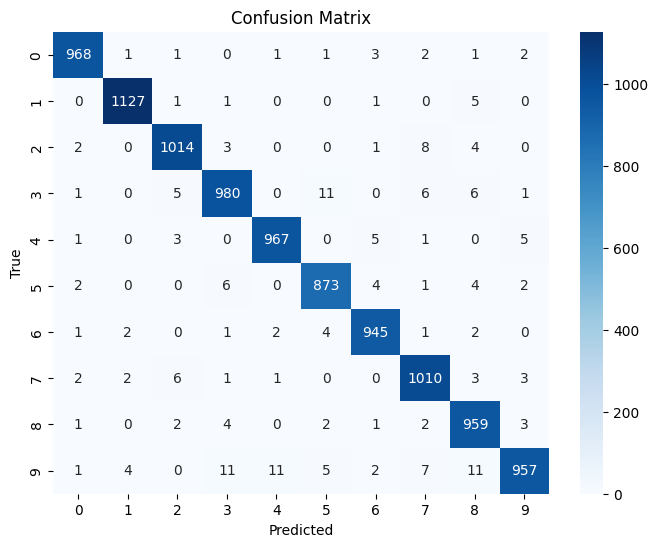

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_classes = np.argmax(y_preds, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(history.history.keys())

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


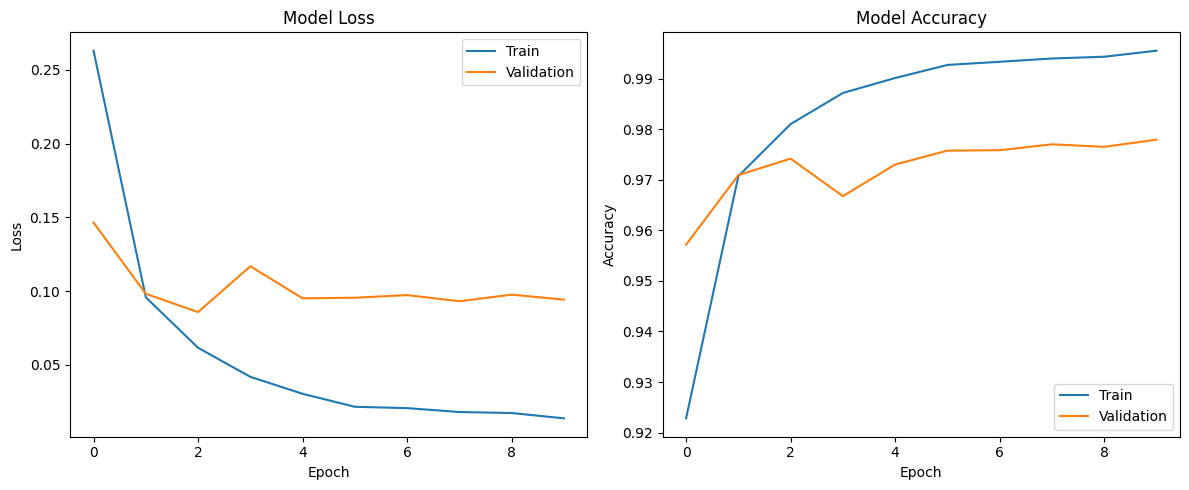

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss on the first axis (ax1)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper right')

# Plot accuracy on the second axis (ax2)
ax2.plot(history.history['categorical_accuracy'])
ax2.plot(history.history['val_categorical_accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()